In [104]:
import pymolpro
import pandas as pd

In [105]:
backend = 'local' 
project_name = 'BHPERI_methodtest'
parallel = 4

In [106]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [107]:
db = pymolpro.database.load("GMTKN55_BHPERI")

In [108]:
small=db.subset(open_shell=False,max_electrons=38)
print(small)

GMTKN55 BHPERI (closed shell only) (maximum number of electrons 38):

Molecules:
13ts_2a: {'geometry': '          10\n  \n    C          0.85850831      0.85149922     -0.05406558\n    C          0.85665794     -0.53234843     -0.02148388\n    N         -1.21895564     -0.93022557     -0.12349726\n    N         -1.66704575      0.25593414     -0.01212111\n    N         -1.21073866      1.33091420     -0.05063028\n    H          1.03972910      1.42014742      0.84839247\n    H          1.04072512      1.37132654     -0.98626823\n    H          1.02509073     -1.05697875      0.91129082\n    H          1.04207243     -1.10394180     -0.92050185\n    H         -1.76604359     -1.60632696      0.40888490\n', 'description': '13ts_2a'}
1,3-Cyclopentadiene: {'geometry': '          11\n  \n    H         -1.78935891      0.87878322      0.00009791\n    C         -1.12663167      0.00011091     -0.00000309\n    C         -0.19168134      0.00002491     -1.18134951\n    C          1.08468111    

In [109]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20e3ac2170>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20e3d3e350>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20e35b3c10>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20607e2290>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20e3987d00>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20607bceb0>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20e3fa7160>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20607e10f0>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20e393b6a0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20607be290>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20607bcc70>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20e38ec0a0>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7f20607a0c40>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7f20607a0910>}, 'CCSD':

In [110]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate                   (results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7f2071002ec0>, 'MP2': <pymolpro.database.Database object at 0x7f20e3966410>, 'MP3': <pymolpro.database.Database object at 0x7f20e3964100>, 'MP4': <pymolpro.database.Database object at 0x7f20e3966230>, 'PAPT2': <pymolpro.database.Database object at 0x7f20e39675b0>, 'PAPT3': <pymolpro.database.Database object at 0x7f20e3e70b20>, 'PAPT4': <pymolpro.database.Database object at 0x7f2071066e90>, 'CCSD': <pymolpro.database.Database object at 0x7f2071066e60>, 'CCSD(T)': <pymolpro.database.Database object at 0x7f2071066b90>}


In [111]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF/cc-pV[23]Z,MP2/cc-pV[23]Z,MP3/cc-pV[23]Z,MP4/cc-pV[23]Z,PAPT;MP2/cc-pV[23]Z,PAPT;MP3/cc-pV[23]Z,PAPT;MP4/cc-pV[23]Z,CCSD/cc-pV[23]Z,CCSD(T)/cc-pV[23]Z
MAD,81.78,24.27,15.60,12.84,14.54,15.11,1.75,19.60,0.00
MAXD,108.83,36.54,27.60,19.83,25.00,25.53,4.25,26.84,0.00
RMSD,85.90,26.21,17.49,13.72,15.91,16.42,2.20,20.45,0.00
MSD,81.78,-24.27,15.60,-12.84,14.54,15.11,-0.98,19.60,0.00
STDEVD,27.87,10.50,8.39,5.12,6.85,6.81,2.09,6.19,0.00


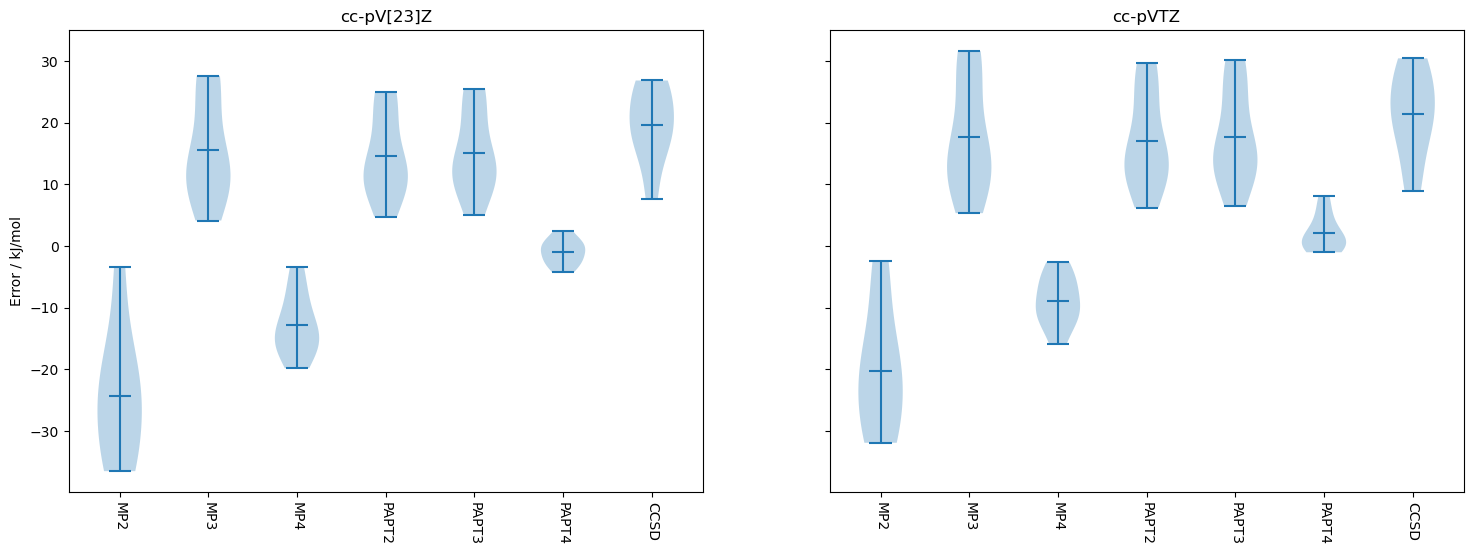

In [112]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z', 'cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
df = pd.DataFrame(data)
df.to_excel("PAPT.xlsx")

In [95]:
extrapolate=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())
extrapolate